In [2]:
from coreLib.dataset import DataSet
data_dir       = "/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source/"
ds=DataSet(data_dir)

#LOG     :All paths found


  0%|          | 1366/1059977 [00:00<01:20, 13197.93it/s]

#LOG     :Processing Dictionary:/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source/bangla/dictionary.csv


100%|██████████| 10305/10305 [00:00<00:00, 594357.93it/s]


#LOG     :converting int labels to string


  1%|          | 2926/370098 [00:00<00:12, 29252.98it/s]

#LOG     :Processing Dictionary:/media/ansary/DriveData/Work/bengalAI/datasets/CraftData/source/english/dictionary.csv


100%|██████████| 5975/5975 [00:00<00:00, 333168.92it/s]


#LOG     :bangla.graphemes


100%|██████████| 200840/200840 [00:00<00:00, 3566371.22it/s]


#LOG     :bangla.numbers


100%|██████████| 72045/72045 [00:00<00:00, 4011611.29it/s]


#LOG     :english.graphemes


100%|██████████| 10305/10305 [00:00<00:00, 2696843.00it/s]


#LOG     :english.numbers
#LOG     :common.symbols


100%|██████████| 982/982 [00:00<00:00, 1313813.88it/s]


#LOG     :bangla.fonts
#LOG     :english.fonts
#LOG     :common.background
#LOG     :common.noise.random


100%|██████████| 3240/3240 [00:00<00:00, 1490081.68it/s]

#LOG     :common.noise.sign


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import numpy as np

from coreLib.render import createSceneImage,backgroundGenerator,createImageData
from coreLib.config import config
backGen=backgroundGenerator(ds,dim=(config.back_dim,config.back_dim))
back=next(backGen)

100%|██████████| 982/982 [00:00<00:00, 760910.13it/s]


100%|██████████| 982/982 [00:00<00:00, 2103578.41it/s]


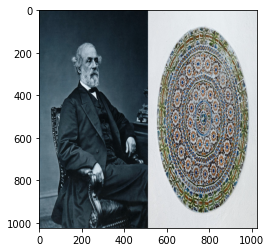

In [5]:
back=next(backGen)
plt.imshow(back)
plt.show()

(1024, 1024)


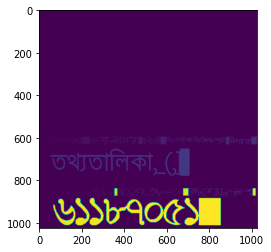

In [6]:
page,labels=createSceneImage(ds)


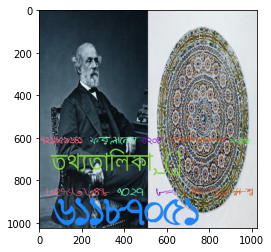

'\nimg\nback\nlabels\n'

In [7]:
from coreLib.render import randColor
import random
import matplotlib.mlab as mlab

for line_label in labels:
    # random choice for color distribution
    _colType=random.choice(["inline","different"])
    if _colType=="inline":
        line_col=randColor()
    else:
        line_col=None
    for label in line_label:
        # format color space
        if line_col is None:
            col=randColor()
        else:
            col=line_col
        # place colors
        for k,v in label.items():
            if v!=' ':
                back[img==k]=col
plt.imshow(back)
plt.show()
'''
img
back
labels
'''


In [8]:
from scipy.spatial import ConvexHull
import argparse
import imutils
import cv2
from PIL import Image
from skimage import measure

def convertToTotalText(page,labels,rotations=None):
    '''
        **_label_mask:polygon
        ** text_lines[0]=
            "x: [[214 280 362 349 284 231]], y: [[325 290 320 347 316 346]], ornt: [u'c'], transcriptions: [u'ASRAMA']"
        @author
        create a function to convert page image to total text format data
        This should not depend on- 
            * language or 
            * type (handwritten/printed) or 
            * data(number/word/symbol)
        args:
            page   :     marked image of a page given at letter by letter 
            labels :     list of markings for each word
        returns:
            whatever is necessary for the total-text format
        FUTURE:
            * Rotation will be added after render class 
    '''
    # your code starts from here 
    # after finalization change returns segment under doc string above
    
    # char mask
    char_mask=np.zeros(page.shape)
    for line_labels in labels:
        for label in line_labels:
            for k,v in label.items():
                if v!=' ':
                    char_mask[page==k]=255

    char_mask=np.expand_dims(char_mask,axis=-1)
    char_mask=np.concatenate([char_mask,char_mask,char_mask],axis=-1)
    char_mask=char_mask.astype("uint8")
    # text lines
    text_lines=[]
    # word_mask
    word_mask=np.zeros(page.shape)
    for line_labels in labels:
        for label in line_labels:
            _label_mask=np.zeros((img.shape), dtype=np.uint8)
            transcriptions=''
            for k,v in label.items():
                if v!=' ':
                    transcriptions+=v
                    idx = np.where(page==k)
                    y_min,y_max,x_min,x_max = np.min(idx[0]), np.max(idx[0]), np.min(idx[1]), np.max(idx[1])
                    word_mask[y_min:y_max+1,x_min:x_max+1]=255
                    _label_mask[y_min:y_max+1,x_min:x_max+1]=255
            
            plt.imshow(_label_mask)
            plt.show()
            print(transcriptions)
            
            contours, hiearchy = cv2.findContours(_label_mask, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
            
            X = []
            Y = []
            x_cord=[]
            y_cord=[]
            for i in range(len(contours)):
                for j in range(len(contours[i])):
                    x_cord.append(contours[i][j][0][0])
                    y_cord.append(contours[i][j][0][1])
            
            X.append(x_cord)
            Y.append(y_cord)
        
            orientation = 'h' ## horizontal
            coordinates = "x: " + str(np.array(X)) + ", " + "y: " + str(np.array(Y)) + ", "+"ornt: "+ str([orientation]) + ", "+ "transcriptions: " + str([transcriptions])  
            print(coordinates)
            
            text_lines.append(coordinates)
            
    word_mask=np.expand_dims(word_mask,axis=-1)
    word_mask=np.concatenate([word_mask,word_mask,word_mask],axis=-1)
    word_mask=word_mask.astype("uint8")
    # bounding box format text file
#     text_lines=[]
    
    return char_mask,word_mask,text_lines

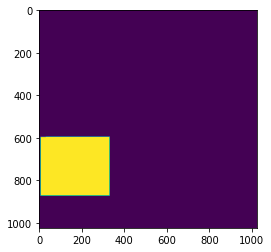

৭২১৯৫৯৬৪১
x: [[ 32  31   7   7 331 331]], y: [[595 596 596 871 871 595]], ornt: ['h'], transcriptions: ['৭২১৯৫৯৬৪১']


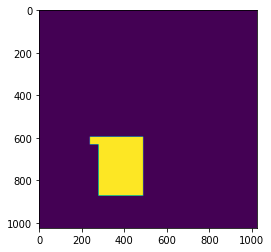

ফরলানের
x: [[239 239 278 279 279 488 488]], y: [[595 630 630 631 871 871 595]], ornt: ['h'], transcriptions: ['ফরলানের']


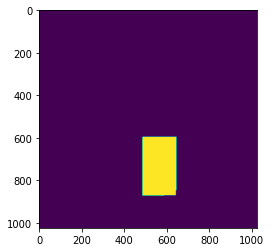

৫২০৪
x: [[487 487 486 485 485 588 588 589 642 642 643 645 645]], y: [[595 596 597 597 871 871 870 869 869 846 845 845 595]], ornt: ['h'], transcriptions: ['৫২০৪']


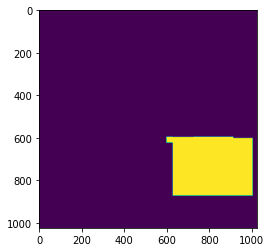

ন্ডিপৌঁশ্লীঙ্গীদ্যিঙ্খিষ্ফস্পৃচাঁ
x: [[ 598  598  627  628  628 1003 1003  913  912  912  726  725  628  627]], y: [[595 622 622 623 871 871 601 601 600 595 595 596 596 595]], ornt: ['h'], transcriptions: ['ন্ডিপৌঁশ্লীঙ্গীদ্যিঙ্খিষ্ফস্পৃচাঁ']


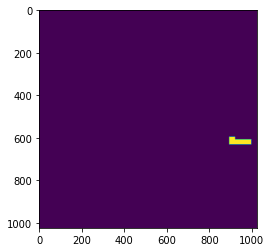

দিশাকে
x: [[893 893 996 996 921 920 920]], y: [[595 630 630 607 607 606 595]], ornt: ['h'], transcriptions: ['দিশাকে']


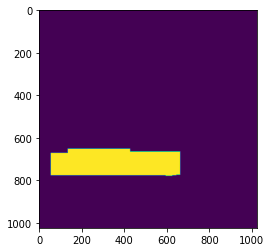

তথ্যতালিকা,_(,]
x: [[135 135 134  55  55 593 594 594 626 626 627 644 644 645 662 662 428 427
  427]], y: [[651 670 671 671 775 775 776 778 778 776 775 775 774 773 773 664 664 663
  651]], ornt: ['h'], transcriptions: ['তথ্যতালিকা,_(,]']


ValueError: zero-size array to reduction operation minimum which has no identity

In [9]:
cm,wm,tl=convertToTotalText(img,labels)

In [114]:
print(tl)

["x: [[ 2  2 28 28]], y: [[640 678 678 640]], ornt: ['h'], transcriptions: ['৪']", "x: [[289 289 322 322 323 368 369 405 405 369 368 368 323 322 237 237 236 191\n  191 190 141 140 140  85  85 140 141 141 190 191 236 236 237 287 287]], y: [[640 678 678 676 675 675 676 676 647 647 646 641 641 640 640 646 647 647\n  650 651 651 650 646 646 675 675 676 677 677 678 678 676 675 675 640]], ornt: ['h'], transcriptions: ['স্পাস্যেথ্রোকৌত্ত্বীখোঁঝা']", "x: [[777 777 776 771 771 776 776 777 806 806 443 443 463 464 492 493 513 514\n  514 539 539 540 590 591 591 616 616 617 640 641 641 669 670 698 698 699\n  710 711 711 740 740 741 770 770 741 740 740 711 711 710 699 698 698 670\n  670 669 641 640 617 616 616 562 561 561 540 540 539 514 513 513 493 493\n  492 464 463 463]], y: [[648 669 670 670 676 676 673 672 672 648 640 674 674 673 673 674 674 675\n  678 678 675 674 674 675 678 678 670 669 669 670 673 673 674 674 664 663\n  663 664 666 666 665 664 664 657 657 656 654 654 659 660 660 659 642 642\n

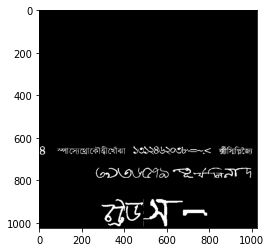

In [115]:
plt.imshow(cm)
plt.show()

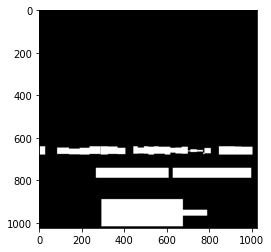

In [116]:
plt.imshow(wm)
plt.show()

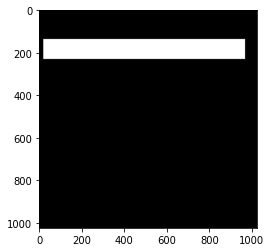

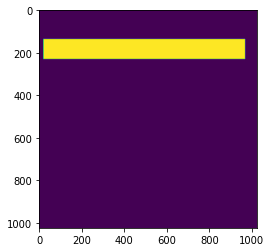

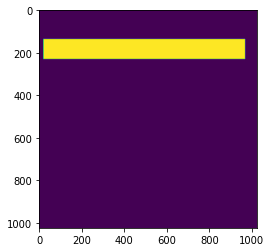

[array([[[ 20, 136]],

       [[ 20, 229]],

       [[967, 229]],

       [[967, 136]]], dtype=int32)]


In [92]:
### debug test
img_path = "/home/rezwanul/Downloads/binK_img.png"
import numpy as np
import cv2
im = cv2.imread(img_path)
plt.imshow(im)
plt.show()

imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(imgray)
plt.show()

ret, thresh = cv2.threshold(imgray, 0, 255, 0)
plt.imshow(thresh)
plt.show()

contours, hiearchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print(contours)
# plt.imshow(contours)
# plt.show()

# Rotation

In [3]:
ds.bangla.graphemes.df

,filename,label,img_path
0,Train_23740,র্ন্ত,/media/ansary/DriveData/Work/bengalAI/datasets...
1,Train_101878,স্ত,/media/ansary/DriveData/Work/bengalAI/datasets...
2,Train_5736,ল্ডো,/media/ansary/DriveData/Work/bengalAI/datasets...
3,Train_76463,গা,/media/ansary/DriveData/Work/bengalAI/datasets...
4,Train_158052,দু,/media/ansary/DriveData/Work/bengalAI/datasets...
...,...,...,...
200835,Train_129198,ফ্র্যা,/media/ansary/DriveData/Work/bengalAI/datasets...
200836,Train_175699,মা,/media/ansary/DriveData/Work/bengalAI/datasets...
200837,Train_38444,ঙ্গ,/media/ansary/DriveData/Work/bengalAI/datasets...
200838,Train_27077,দ্ভ,/media/ansary/DriveData/Work/bengalAI/datasets...


In [7]:
sorted(ds.bangla.graphemes.df.label.unique())

['ং',
 'ঃ',
 'অ',
 'অ্যা',
 'আ',
 'আঁ',
 'ই',
 'ইঁ',
 'ঈ',
 'উ',
 'উঁ',
 'ঊ',
 'ঋ',
 'এ',
 'এঁ',
 'এ্যা',
 'ঐ',
 'ও',
 'ঔ',
 'ক',
 'কা',
 'কাঁ',
 'কি',
 'কী',
 'কু',
 'কুঁ',
 'কূ',
 'কৃ',
 'কে',
 'কেঁ',
 'কৈ',
 'কো',
 'কৌ',
 'ক্ক',
 'ক্কা',
 'ক্কি',
 'ক্কে',
 'ক্কো',
 'ক্ট',
 'ক্টা',
 'ক্টি',
 'ক্টে',
 'ক্টো',
 'ক্ট্র',
 'ক্ট্রো',
 'ক্ত',
 'ক্তা',
 'ক্তি',
 'ক্তৃ',
 'ক্তে',
 'ক্তো',
 'ক্য',
 'ক্যা',
 'ক্যু',
 'ক্যে',
 'ক্র',
 'ক্রা',
 'ক্রি',
 'ক্রী',
 'ক্রু',
 'ক্রূ',
 'ক্রে',
 'ক্রো',
 'ক্র্যা',
 'ক্ল',
 'ক্লা',
 'ক্লি',
 'ক্লে',
 'ক্লো',
 'ক্ষ',
 'ক্ষা',
 'ক্ষি',
 'ক্ষী',
 'ক্ষু',
 'ক্ষে',
 'ক্ষো',
 'ক্ষৌ',
 'ক্ষ্ণ',
 'ক্ষ্ণৌ',
 'ক্ষ্ম',
 'ক্ষ্মী',
 'ক্ষ্য',
 'ক্ষ্যা',
 'ক্ষ্যে',
 'ক্স',
 'ক্সা',
 'ক্সি',
 'ক্সে',
 'খ',
 'খা',
 'খাঁ',
 'খি',
 'খী',
 'খু',
 'খুঁ',
 'খৃ',
 'খে',
 'খৈ',
 'খো',
 'খোঁ',
 'খ্য',
 'খ্যা',
 'খ্রি',
 'খ্রী',
 'গ',
 'গা',
 'গাঁ',
 'গি',
 'গী',
 'গু',
 'গুঁ',
 'গূ',
 'গৃ',
 'গে',
 'গেঁ',
 'গৈ',
 'গো',
 'গোঁ',
 'গৌ',
 'গ্ধ',
 'গ্ধা',
 'গ্ন',
 'গ্না',
 'গ্নি',
 

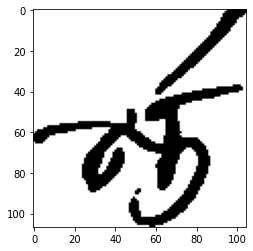

In [6]:
plt.imshow(cv2.imread(ds.bangla.graphemes.df.iloc[0,2],0),cmap="gray")
plt.show()

In [9]:
img=cv2.imread(ds.bangla.graphemes.df.iloc[0,2],0)
np.where(img==0)

(array([  0,   0,   0, ..., 106, 106, 106]),
 array([95, 96, 97, ..., 57, 58, 59]))

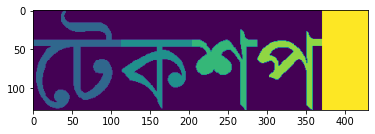

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
import numpy as np
iden=2
from coreLib.word import create_word
img,label,iden=create_word(iden,
                            "bangla",
                            "printed",
                            "grapheme",
                            ds,
                            use_dict=True)
# max neutralization
plt.imshow(img)
plt.show()


In [ ]:
def padImg(line_img,h_max,w_max):
    # shape
    h,w=line_img.shape
    # pad widths
    left_pad_width =(w_max-w)//2   # <<<<<<<<==========
    # print(left_pad_width)
    right_pad_width=w_max-w-left_pad_width   # <<<<<<<<==========
    # pads
    left_pad =np.zeros((h,left_pad_width))
    right_pad=np.zeros((h,right_pad_width))
    # pad
    line_img =np.concatenate([left_pad,line_img,right_pad],axis=1)
    
    # shape
    h,w=line_img.shape
    # pad heights
    top_pad_height =(h_max-h)//2
    bot_pad_height=h_max-h-top_pad_height
    # pads
    top_pad =np.zeros((top_pad_height,w))
    bot_pad=np.zeros((bot_pad_height,w))
    # pad
    line_img =np.concatenate([top_pad,line_img,bot_pad],axis=0)
    return line_img

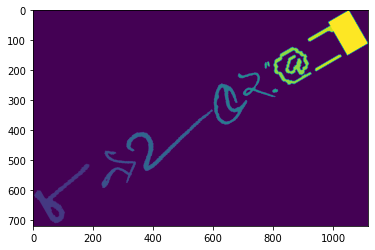

{2: '৮', 3: '৯', 4: '২', 5: '৫', 6: '২', 7: '.', 8: "'", 9: "'", 10: '@', 11: '=', 12: ' '}


In [22]:
def rotate_image(mat, angle):
    """
        Rotates an image (angle in degrees) and expands image to avoid cropping
    """

    height, width = mat.shape[:2] # image shape has 3 dimensions
    image_center = (width/2, height/2) # getRotationMatrix2D needs coordinates in reverse order (width, height) compared to shape

    rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)

    # rotation calculates the cos and sin, taking absolutes of those.
    abs_cos = abs(rotation_mat[0,0]) 
    abs_sin = abs(rotation_mat[0,1])

    # find the new width and height bounds
    bound_w = int(height * abs_sin + width * abs_cos)
    bound_h = int(height * abs_cos + width * abs_sin)

    # subtract old image center (bringing image back to origo) and adding the new image center coordinates
    rotation_mat[0, 2] += bound_w/2 - image_center[0]
    rotation_mat[1, 2] += bound_h/2 - image_center[1]

    # rotate image with the new bounds and translated rotation matrix
    rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h),flags=cv2.INTER_NEAREST)
    return rotated_mat,rotation_mat


rotated_img,M=rotate_image(img,30)
plt.imshow(rotated_img)
plt.show()
print(label)
#_img=cv2.resize(_img,(width,font_size)),fx=0,fy=0, interpolation = cv2.INTER_NEAREST)

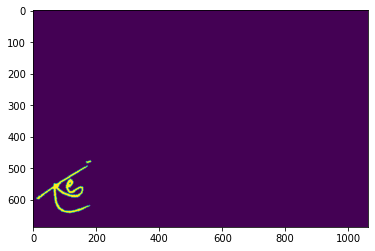

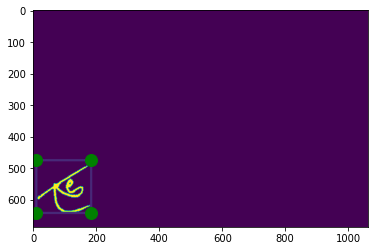

In [13]:
# back=np.zeros(rotated_img.shape)
# back[rotated_img==2]=255
# plt.imshow(back)
# plt.show()
# # co-ordinate
# idx = np.where(back==255)
# y_min,y_max,x_min,x_max = np.min(idx[0]), np.max(idx[0]), np.min(idx[1]), np.max(idx[1])
# x1,x2,x3,x4=x_min,x_max,x_max,x_min
# y1,y2,y3,y4=y_min,y_min,y_max,y_max
# coords=np.array([[x1,y1],[x2,y2],[x3,y3],[x4,y4]],dtype="float32")

# single = cv2.rectangle(back, (x1,y1), (x3,y3), 30, 5)
# plt.plot(x1, y1, 'go--', linewidth=2, markersize=12)
# plt.plot(x2, y2, 'go--', linewidth=2, markersize=12)
# plt.plot(x3, y3, 'go--', linewidth=2, markersize=12)
# plt.plot(x4, y4, 'go--', linewidth=2, markersize=12)
# plt.imshow(single)
# plt.show()

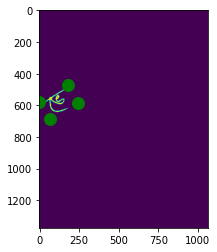

In [19]:
# back=np.zeros(rotated_img.shape)
# back[rotated_img==2]=255
# back=np.concatenate([back,np.zeros(bach,w=img.shape
          if w>w_max:
            w_max=w

          imgs.append(img)
          labels.append(label)


        w_max+=32
        padded=[]
        for img in imgs:
          img=padImg(img,h_max,w_max) ### <<<<<================= Call Function
          padded.append(img)
k.shape)],axis=0)
# # co-ordinate
# idx = np.where(img==2)
# y_min,y_max,x_min,x_max = np.min(idx[0]), np.max(idx[0]), np.min(idx[1]), np.max(idx[1])
# x1,x2,x3,x4=x_min,x_max,x_max,x_min
# y1,y2,y3,y4=y_min,y_min,y_max,y_max
# coords=np.array([[x1,y1],[x2,y2],[x3,y3],[x4,y4]],dtype="float32")

# new_coords=[]
# coord_mat=np.concatenate([coords,np.ones((4,1))],axis=1)
# for c in coord_mat:
#     new_coords.append(np.dot(M,c))

# plt.imshow(back)
# for c in new_coords:
#     plt.plot(c[0], c[1], 'go--', linewidth=2, markersize=12)

# plt.show()


